In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns

In [2]:
# Loading the dataset after being downloaded from kaggle
application_train = pd.read_csv('application_train.csv')
bureau = pd.read_csv('bureau.csv')


In [3]:
# Shape of the Data Set
print('The application_train data has : %d row with %d features' %(application_train.shape[0],application_train.shape[1]))
print('The bureau data has : %d row with %d features' %(bureau.shape[0],bureau.shape[1]))


The application_train data has : 307511 row with 122 features
The bureau data has : 1716428 row with 17 features


In [4]:
# Check to confirm the tables in the Dataset have the same key column?

print(application_train.iloc[0:1,0:1])
print(bureau.iloc[0:1,0:1])


   SK_ID_CURR
0      100002
   SK_ID_CURR
0      215354


In [5]:
print(application_train.dtypes.value_counts())
print(bureau.dtypes.value_counts())


float64    65
int64      41
object     16
dtype: int64
float64    8
int64      6
object     3
dtype: int64


In [6]:
print('Column Names : ', application_train.columns.values)


Column Names :  ['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRA

In [9]:
print('Column Names : ', bureau.columns.values)


Column Names :  ['SK_ID_CURR' 'SK_ID_BUREAU' 'CREDIT_ACTIVE' 'CREDIT_CURRENCY'
 'DAYS_CREDIT' 'CREDIT_DAY_OVERDUE' 'DAYS_CREDIT_ENDDATE'
 'DAYS_ENDDATE_FACT' 'AMT_CREDIT_MAX_OVERDUE' 'CNT_CREDIT_PROLONG'
 'AMT_CREDIT_SUM' 'AMT_CREDIT_SUM_DEBT' 'AMT_CREDIT_SUM_LIMIT'
 'AMT_CREDIT_SUM_OVERDUE' 'CREDIT_TYPE' 'DAYS_CREDIT_UPDATE' 'AMT_ANNUITY']


In [8]:
application_train.head(5)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
bureau.head(5)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


# Statistical Description Summary of Numerical Columns 

In [11]:
application_train.describe().apply(lambda s:s.apply(lambda x: format(x,'f')))


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,168797.919297,599025.999706,27108.573909,538396.207429,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,237123.146279,402490.776996,14493.737315,369446.460540,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,25650.000000,45000.000000,1615.500000,40500.000000,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,112500.000000,270000.000000,16524.000000,238500.000000,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,147150.000000,513531.000000,24903.000000,450000.000000,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,202500.000000,808650.000000,34596.000000,679500.000000,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,117000000.000000,4050000.000000,258025.500000,4050000.000000,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [12]:
bureau.describe().apply(lambda s:s.apply(lambda x: format(x,'f')))


,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1716428.000000,1716428.000000,1716428.000000,1716428.000000,1610875.000000,1082775.000000,591940.000000,1716428.000000,1716415.000000,1458759.000000,1124648.000000,1716428.000000,1716428.000000,489637.000000
mean,278214.933645,5924434.489032,-1142.107685,0.818167,510.517362,-1017.437148,3825.417661,0.006410,354994.591918,137085.119952,6229.514980,37.912758,-593.748320,15712.757700
std,102938.558112,532265.728552,795.164928,36.544428,4994.219837,714.010626,206031.606207,0.096224,1149811.343980,677401.130952,45032.031476,5937.650035,720.747312,325826.949053
min,100001.000000,5000000.000000,-2922.000000,0.000000,-42060.000000,-42023.000000,0.000000,0.000000,0.000000,-4705600.320000,-586406.115000,0.000000,-41947.000000,0.000000
25%,188866.750000,5463953.750000,-1666.000000,0.000000,-1138.000000,-1489.000000,0.000000,0.000000,51300.000000,0.000000,0.000000,0.000000,-908.000000,0.000000
50%,278055.000000,5926303.500000,-987.000000,0.000000,-330.000000,-897.000000,0.000000,0.000000,125518.500000,0.000000,0.000000,0.000000,-395.000000,0.000000
75%,367426.000000,6385681.250000,-474.000000,0.000000,474.000000,-425.000000,0.000000,0.000000,315000.000000,40153.500000,0.000000,0.000000,-33.000000,13500.000000
max,456255.000000,6843457.000000,0.000000,2792.000000,31199.000000,0.000000,115987185.000000,9.000000,585000000.000000,170100000.000000,4705600.320000,3756681.000000,372.000000,118453423.500000


In [13]:
application_train.nunique()
# application_train data has : 307511 row's all unique Client ID's 'SK_ID_CURR'


SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [14]:
# keep original tables and create working copies 
df_application_train = application_train
df_bureau = bureau


In [15]:
# Create list of all dataframes I will be working on
df_All= [df_application_train,
         df_bureau]


In [16]:
df_application_train.index.name = "df_application_train"
df_bureau.index.name = "df_bureau"


# MERGING OUR TWO DATAFRAMES

In [17]:
### merge two dataframes

df_merged_data = pd.merge(df_application_train,df_bureau, how='right',  left_on='SK_ID_CURR', right_on='SK_ID_CURR')

### save as .csv file
df_merged_data.to_csv('df_merged_data.csv')

### load from .csv file to save computation time during testing
#df_merged_data = pd.read_csv('df_merged_data.csv')


In [18]:
df_merged_data.DAYS_BIRTH.isnull().sum()


251103

In [19]:
df_merged_data.AMT_CREDIT_SUM_OVERDUE.describe()


count    1.716428e+06
mean     3.791276e+01
std      5.937650e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.756681e+06
Name: AMT_CREDIT_SUM_OVERDUE, dtype: float64

In [7]:
df_merged_data.head()


,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,0,215354,0.0,Cash loans,F,Y,N,0.0,270000.0,720000.0,...,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,1,215354,0.0,Cash loans,F,Y,N,0.0,270000.0,720000.0,...,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,2,215354,0.0,Cash loans,F,Y,N,0.0,270000.0,720000.0,...,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,3,215354,0.0,Cash loans,F,Y,N,0.0,270000.0,720000.0,...,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,4,215354,0.0,Cash loans,F,Y,N,0.0,270000.0,720000.0,...,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


# Dealing with Data Errors Values


In [20]:
 # 4 people with XNA code gender
df_merged_data = df_merged_data[df_merged_data['CODE_GENDER'] != 'XNA'] 


In [21]:
# Remove 117 000 000 Outlier in Amt Income column
df_merged_data = df_merged_data[df_merged_data['AMT_INCOME_TOTAL'] < 20000000] 
print(df_application_train['AMT_INCOME_TOTAL'].max())
print(df_merged_data['AMT_INCOME_TOTAL'].max())


117000000.0
9000000.0


In [22]:
# Remove Outlier in DAYS_EMPLOYED column
df_merged_data['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)


# REMOVING COLUMNS WITH MISSING VALUES >60%

In [23]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [24]:
def missing_data_column_names(df):
    # Returns column names with missing data  
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the column header
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
    delete_columns =  mis_val_table_ren_columns[mis_val_table_ren_columns['% of Total Values'].values > 40]
    col_names = delete_columns.index
    return col_names

In [25]:
miss = missing_values_table(df_merged_data)


Your selected dataframe has 139 columns.
There are 68 columns that have missing values.


In [26]:
miss.to_csv('missing.csv')


In [26]:
# Delete columns with missing values as greater than 40% missing  
missing_columns = missing_data_column_names(df_merged_data)
missing_columns


Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [27]:
# Apply column REMOVE with >40% missing data
# Delete columns with missing values greater than 40% missing

df_merged_data.drop(missing_columns, axis = 1, inplace = True)
print("Done")

Done


In [28]:
df_merged_data.shape


(1465287, 88)

# Dataframe had 140 columns

# Now 89 columns

In [29]:
missing_values_table(df_merged_data)


Your selected dataframe has 88 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
DAYS_ENDDATE_FACT,544656,37.2
AMT_CREDIT_SUM_LIMIT,489653,33.4
OCCUPATION_TYPE,455655,31.1
DAYS_EMPLOYED,256689,17.5
AMT_CREDIT_SUM_DEBT,223088,15.2
DAYS_CREDIT_ENDDATE,89095,6.1
EXT_SOURCE_3,44915,3.1
NAME_TYPE_SUITE,5720,0.4
OBS_60_CNT_SOCIAL_CIRCLE,3925,0.3
DEF_60_CNT_SOCIAL_CIRCLE,3925,0.3


In [34]:
# Find correlations with the target and sort

correlations = df_merged_data.corr()['TARGET'].sort_values()

# Display correlations
        
print('\nMost Positive Correlations:\n', correlations.tail(5))
print('\nMost Negative Correlations:\n', correlations.head(5))    



Most Positive Correlations:
 DAYS_CREDIT        0.061556
DAYS_BIRTH         0.066888
TARGET             1.000000
FLAG_MOBIL              NaN
FLAG_DOCUMENT_2         NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3      -0.184276
EXT_SOURCE_2      -0.146115
AGE_YEARS         -0.066888
DAYS_EMPLOYED     -0.032887
AMT_GOODS_PRICE   -0.030615
Name: TARGET, dtype: float64


## Delete Columns Not Required

In [30]:
# delete using a loop
cols_to_delete = ['FLAG_DOCUMENT_2',
                    'FLAG_DOCUMENT_3',
                    'FLAG_DOCUMENT_4',
                    'FLAG_DOCUMENT_5',
                    'FLAG_DOCUMENT_6',
                    'FLAG_DOCUMENT_7',
                    'FLAG_DOCUMENT_8',
                    'FLAG_DOCUMENT_9',
                    'FLAG_DOCUMENT_10',
                    'FLAG_DOCUMENT_11',
                    'FLAG_DOCUMENT_12',
                    'FLAG_DOCUMENT_13',
                    'FLAG_DOCUMENT_14',
                    'FLAG_DOCUMENT_15',
                    'FLAG_DOCUMENT_16',
                    'FLAG_DOCUMENT_17',
                    'FLAG_DOCUMENT_18',
                    'FLAG_DOCUMENT_19',
                    'FLAG_DOCUMENT_20',
                    'FLAG_DOCUMENT_21',]

for col in df_merged_data.columns:
    if col in cols_to_delete:
        del df_merged_data[col]
print('Done')

Done


In [31]:
df_merged_data.shape


(1465287, 68)

# AGE column: We can assign a mean or Median value for age instead of deleting  na rows

In [33]:
#Convert age data from days to years
# NEW FEATURE: 'AGE_YEARS'
df_merged_data['AGE_YEARS'] = abs((df_merged_data['DAYS_BIRTH']) / 365) #Create new column


In [34]:
df_merged_data.AGE_YEARS.isnull().sum()


0

New Feature: Age in years
From previous data exploration the borrowers age was found to require preprocessing as it was listed in days and not years. A new column converting days to years 'AGE_YEARS' was created. 


In [35]:
#Use the mean of age
age_mean = df_merged_data.AGE_YEARS.mean()
age_mean
# Fill the missing values with mean value of month in data.
df_merged_data['AGE_YEARS'].fillna(age_mean, inplace = True)
df_merged_data.AGE_YEARS.isnull().sum()


0

## Feature: Create Age Group Buckets

In [36]:
# here I define the threshhold or our age groups
age_groups = [0, 11, 17, 25, 35, 45, 55, 65, 100]

# we give each of them a label
age_group_names = ['<11', '11-17', '17-25', '25-35', '35-45', '45-55', '55-65', '>65']


In [37]:
df_merged_data['AGE_GROUP'] = pd.cut(df_merged_data['AGE_YEARS'], bins=age_groups, labels=age_group_names)


we create a new category column, that gives the person’s age group
using the pandas.cut method with the bins and the names parameters

In [25]:
df_merged_data['AGE_GROUP']


0          45-55
1          45-55
2          45-55
3          45-55
4          45-55
           ...  
1716423    45-55
1716424    55-65
1716425    55-65
1716426    55-65
1716427    55-65
Name: AGE_GROUP, Length: 1465287, dtype: category
Categories (8, object): ['<11' < '11-17' < '17-25' < '25-35' < '35-45' < '45-55' < '55-65' < '>65']

# Normalization AGE- Scaling to a Range 

In [54]:
  
# apply normalization techniques to Column df_merged_data['AGE_YEARS']

df_merged_data['AGE_YEARS_SCALED'] = ((df_merged_data['AGE_YEARS'] - df_merged_data['AGE_YEARS'].min()) / df_merged_data['AGE_YEARS'].max() - df_merged_data['AGE_YEARS'].min())    
  
# view normalized data
df_merged_data['AGE_YEARS_SCALED'].describe()

count    1.716394e+06
mean    -2.016728e+01
std      1.527799e-01
min     -2.051781e+01
25%     -2.027976e+01
50%     -2.016728e+01
75%     -2.005358e+01
max     -1.981498e+01
Name: AGE_YEARS_SCALED, dtype: float64

Scaling to a range is a good choice when both of the following conditions are met:
• You know the approximate upper and lower bounds on your data with few or no outliers.
• Your data is approximately uniformly distributed across that range.
• A good example is age. Most age values falls between 0 and 90, and every part of the range has
a substantial number of people

In [21]:
#create pivot table
# AMT_CREDIT_SUM_OVERDUE: Current amount overdue on Credit Bureau credit
result = pd.pivot_table(data=df_merged_data, index='CREDIT_TYPE',columns='AGE_GROUP',values='AMT_CREDIT_SUM_OVERDUE')
print(result)


AGE_GROUP                                           17-25       25-35  \
CREDIT_TYPE                                                             
Another type of loan                             0.000000    3.041096   
Car loan                                         0.000000  161.938029   
Cash loan (non-earmarked)                             NaN    0.000000   
Consumer credit                                 36.568766   58.522717   
Credit card                                     76.310137   69.031990   
Interbank credit                                      NaN    0.000000   
Loan for business development                   29.182500    0.000000   
Loan for purchase of shares (margin lending)          NaN         NaN   
Loan for the purchase of equipment                    NaN    0.000000   
Loan for working capital replenishment        9806.625000    0.000000   
Microloan                                      387.983766    0.586493   
Mobile operator loan                               

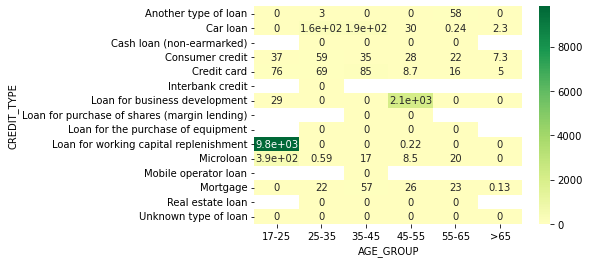

In [22]:
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()


# Feature: Create Client CREDIT TO INCOME RATIO:

In [32]:
# AMT_CREDIT: Credit amount of the loan
# AMT_INCOME_TOTAL: Income of the client
# # CREDIT TO INCOME RATIO:
df_merged_data['INCOME_CREDIT_RATIO'] = df_merged_data['AMT_CREDIT']/  df_merged_data['AMT_INCOME_TOTAL']


Feature: Client’s credit to income ratio
Home Credit is a lending institution and credit analysis of the borrower is very important.  A credit to income ratio indicates how much Home Credit debt the borrower has outstanding as a percentage of their income. 'INCOME_CREDIT_RATIO' was created using AMT_CREDIT: Credit amount of the loan divided by  AMT_INCOME_TOTAL: Income of the client.


# Feature: Create BUREAU CREDIT TO INCOME RATIO:

In [35]:
# AMT_CREDIT_SUM: Current credit amount for the Credit Bureau credit
# AMT_INCOME_TOTAL: Income of the client
# # BUREAU CREDIT TO INCOME RATIO:
df_merged_data['BUREAU_INCOME_CREDIT_RATIO'] = df_merged_data['AMT_CREDIT_SUM']/  df_merged_data['AMT_INCOME_TOTAL']


Feature: Bureau credit to income ratio:
The data from the credit bureau represents loans the client has outstanding with other   institutions and not from the Home Credit company. This ratio indicates how much outside  debt the borrower has outstanding as a percentage of their income. The main difference is this amount indicates loans taken out from other institutions. BUREAU_INCOME_CREDIT_RATIO was created as AMT_CREDIT_SUM (Current credit amount for the Credit Bureau credit) divided by AMT_INCOME_TOTAL (Income of the client)


# Feature: Average credit score based on External sources

In [50]:
# New features based on External sources of clients credit score

df_merged_data['EXT_SOURCES_WEIGHTED'] = (df_merged_data.EXT_SOURCE_2 + df_merged_data.EXT_SOURCE_3) / 2


The dataset contains credit scores of the client form three outside sources. One source had more than 40% missing values and was dropped. Credit scores all range between 0.00 and 1.00.  An average of two remaining scores were included for testing and modelling purposes as EXT_SOURCES_WEIGHTED.